## Import ibraries

In [20]:
import pandas as pd
import numpy as np

import plotly.graph_objs as go

## Read train file

In [21]:
train_df = pd.read_table("training_set_rel3.tsv", encoding="ISO-8859-1")
train_df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Read test file

In [22]:
test_df = pd.read_table("test_set.tsv", encoding="ISO-8859-1")
test_df.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


## Getting dolumns description for both train & test datasets

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4254 non-null   int64  
 1   essay_set             4254 non-null   int64  
 2   essay                 4254 non-null   object 
 3   domain1_predictionid  4254 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 166.3+ KB


## Checking NA values in train dataset

In [25]:
train_df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [26]:
train_df.dropna(axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   essay_id        12976 non-null  int64 
 1   essay_set       12976 non-null  int64 
 2   essay           12976 non-null  object
 3   rater1_domain1  12976 non-null  int64 
 4   rater2_domain1  12976 non-null  int64 
 5   domain1_score   12976 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 608.4+ KB


## Get a brief idea about our train dataset

In [27]:
train_df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,6.800247
std,6309.074105,2.136913,4.212544,4.264330,8.970705
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,2.000000,2.000000
50%,10044.500000,4.000000,3.000000,3.000000,3.000000
75%,15681.250000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


## Check the number of sets and counts in each set

In [28]:
train_df.groupby("essay_set").size()

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
dtype: int64

From the output above we see that we have similar essay counts in each set but set 8 which has around have of the average count

## Descripe rater1 & rater2 in the train dataset
### Domain1 (Writing Applications), Domain2 (Language Conventions)

In [29]:
rate1_count_df = pd.DataFrame(train_df.groupby("rater1_domain1").size(), columns= ["score_count"])
print(rate1_count_df.count())
rate1_count_df

score_count    30
dtype: int64


,score_count
rater1_domain1,
0,462
1,2062
2,2556
3,2789
4,2254
5,704
6,266
7,127
8,420


In [30]:
rate2_count_df = pd.DataFrame(train_df.groupby("rater2_domain1").size(), columns= ["score_count"])
print(rate2_count_df.count())
rate2_count_df

score_count    29
dtype: int64


,score_count
rater2_domain1,
0,468
1,2091
2,2561
3,2698
4,2326
5,704
6,264
7,120
8,432


## The resolved rating

In [31]:
resolvedRate_count_df = pd.DataFrame(train_df.groupby("domain1_score").size(), columns= ["score_count"])
print(resolvedRate_count_df.count())
resolvedRate_count_df.head(20)

score_count    53
dtype: int64


,score_count
domain1_score,
0,418
1,1736
2,2445
3,2830
4,1424
5,96
6,137
7,163
8,737


## Domain1 score ranges according to essay set

In [32]:
essaySet_domainScore_df = train_df[["essay_set", "domain1_score"]].groupby("essay_set").describe()["domain1_score"][["min", "max"]]
essaySet_domainScore_df.head(50)

,min,max
essay_set,,
1,2.0,12.0
2,1.0,6.0
3,0.0,3.0
4,0.0,3.0
5,0.0,4.0
6,0.0,4.0
7,2.0,24.0
8,10.0,60.0


## Visualization of set distribution 

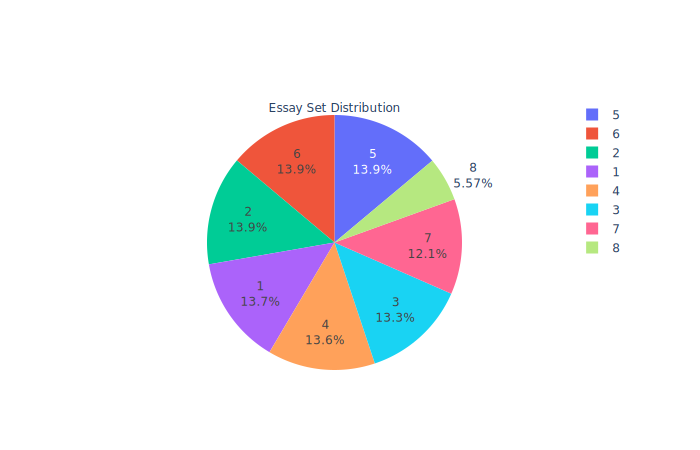

In [33]:
essaySet_labels = train_df["essay_set"].value_counts().index
essaySet_freqs = train_df["essay_set"].value_counts().values
essay_set_pie = go.Figure(data=[go.Pie(labels=essaySet_labels, values=essaySet_freqs, title="Essay Set Distribution", textinfo="label+percent")])
essay_set_pie.show("svg")

## Visualization of domain1 scores

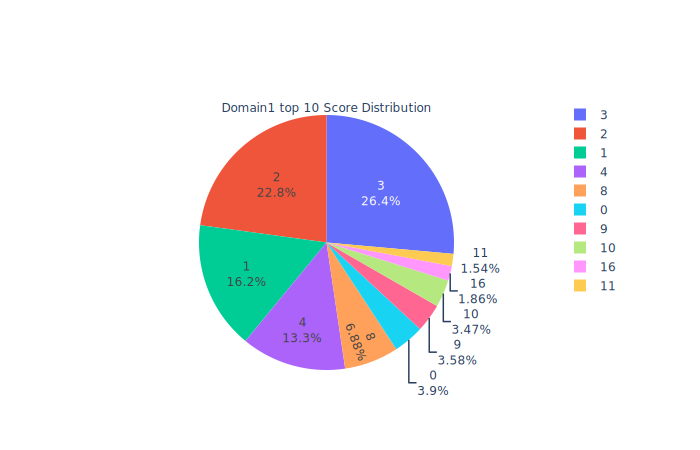

In [34]:
domain1Score_labels = train_df["domain1_score"].value_counts()[:10].index
domain1Score_freqs = train_df["domain1_score"].value_counts()[:10].values
domain1_score_pie = go.Figure(data=[go.Pie(labels=domain1Score_labels, values=domain1Score_freqs, title="Domain1 top 10 Score Distribution", textinfo="label+percent")])
domain1_score_pie.show("svg")


## Data preprocessing